<a href="https://colab.research.google.com/github/orin00/bucheon_Green/blob/main/test_market_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/market/'

/content/drive/MyDrive/market


In [ ]:
%pwd

'/content/drive/MyDrive/market'

# 머신러닝 초기 단계

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('NY-House-Dataset.csv')

In [ ]:
df.shape

(4801, 17)

In [ ]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


BROKERTITLE: 부동산 중개업자(브로커) 또는 에이전트의 이름 혹은 타이틀.

TYPE: 부동산의 유형 (예: 아파트, 단독주택, 상업용 건물 등).

PRICE: 해당 부동산의 가격.

BEDS: 침실의 개수.

BATH: 욕실의 개수.

PROPERTYSQFT: 부동산의 총 면적(제곱피트 단위).

ADDRESS: 전체 주소. 이 필드는 나머지 주소 관련 칼럼을 조합하여 구성될 수 있음.

STATE: 부동산이 위치한 주(State).

MAIN_ADDRESS: 주소의 주요 부분 (대체로 건물 번호와 도로명).

ADMINISTRATIVE_AREA_LEVEL_2: 부동산이 속한 행정 구역 (대체로 카운티 또는 구 수준).

LOCALITY: 부동산이 위치한 도시 또는 읍/면/동.

SUBLOCALITY: 해당 부동산의 하위 지역 구분 (예: 동네 또는 구역).

STREET_NAME: 부동산이 위치한 도로 또는 거리 이름.

LONG_NAME: 부동산의 상세한 이름 또는 설명.

FORMATTED_ADDRESS: 전체 주소를 사람이 읽기 쉬운 형식으로 변환한 필드.

LATITUDE: 부동산의 위도 좌표.

LONGITUDE: 부동산의 경도 좌표.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [ ]:
# 특징 변수(X)와 목표 변수(y) 분리
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [ ]:
print(X.head())

                                         BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

   BEDS       BATH  PROPERTYSQFT  \
0     2   2.000000        1400.0   
1     7  10.000000       17545.0   
2     4   2.000000        2015.0   
3     3   1.000000         445.0   
4     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3 

In [ ]:
print(y.head())

0       315000
1    195000000
2       260000
3        69000
4     55000000
Name: PRICE, dtype: int64


In [ ]:
# 이상치 제거없이 학습 진행

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 범주형 데이터와 수치형 데이터를 나누어 처리
categorical_features = ['BROKERTITLE', 'TYPE', 'STATE', 'ADDRESS', 'MAIN_ADDRESS']
numeric_features = ['BEDS', 'BATH', 'PROPERTYSQFT']

# 범주형 데이터를 One-Hot Encoding으로 변환
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# 모델 파이프라인 설정 (선형 회귀)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # 랜덤 포레스트 사용 시 RandomForestRegressor()로 변경 가능
])

# 학습 데이터와 평가 데이터 분리
# test_size는 0.25가 기본값
# random_state는 고정된 값에 의해서 지정된 랜덤 값만 뽑힘
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape) # X, y끼리는 열이 맞는지 보고
print(y_train.shape, y_test.shape) # train끼리 test끼리 행이 맞는지 봐야함

(3840, 16) (961, 16)
(3840,) (961,)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from math import sqrt

# 모델 학습
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BROKERTITLE', 'TYPE',
                                                   'STATE', 'ADDRESS',
                                                   'MAIN_ADDRESS']),
                                                 ('num', 'passthrough',
                                                  ['BEDS', 'BATH',
                                                   'PROPERTYSQFT'])])),
                ('model', LinearRegression())])

In [ ]:
# 예측값 생성
y_pred = model_pipeline.predict(X_test)
y_pred

array([ 3.78136930e+06,  2.45074825e+06, -2.96041797e+05,  1.02781215e+07,
       -7.03563036e+05,  5.18742880e+06,  2.15907014e+06, -6.82259570e+05,
        5.44675739e+06,  4.49303541e+06, -9.80870409e+05,  3.45827816e+06,
        2.69624906e+06,  4.13317029e+06,  7.05459726e+06,  1.46083257e+06,
        1.00814796e+06,  2.65187213e+06, -3.17940539e+06,  4.69669920e+06,
        6.00694594e+05,  3.52163835e+06,  3.25208264e+06,  1.14734521e+07,
        2.88998505e+06,  2.43050956e+04,  7.90313047e+06, -1.17800667e+06,
        3.15443149e+06,  2.26494336e+06,  8.66732199e+06, -1.65139628e+06,
        4.21695543e+06,  6.11411444e+06,  7.60682402e+06,  2.60822436e+06,
        7.17731077e+06,  3.51722887e+06,  3.23801814e+06, -5.18792492e+04,
       -1.66879366e+06,  4.11958771e+05,  1.88226785e+06,  3.07747330e+06,
        3.01289463e+06, -2.74013516e+04,  5.06905125e+06, -6.86460106e+04,
       -8.57626088e+06,  8.43080654e+05, -2.18271276e+05, -2.11205875e+06,
        2.06027711e+06,  

In [ ]:
y_test

,PRICE
596,750000
4507,899000
3049,5900000
2957,1695000
8,265000
...,...
198,800000
2422,598000
1485,725000
402,790000


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from math import sqrt

print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('RMSE : ', sqrt(mean_squared_error(y_test, y_pred)))
print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))
print('r2 Score : ', r2_score(y_test, y_pred))

MAE :  3041248.209249143
MSE :  31193510406812.2
RMSE :  5585115.075521023
MAPE :  3.7905526086764945
r2 Score :  -0.23809150609250196


In [ ]:
# X_test에서 1번째 행을 데이터프레임 형태로 가져오기
input_data = X_test.iloc[[1]]  # iloc를 사용하여 정수 인덱스 접근

# 예측 수행
predicted_price = model_pipeline.predict(input_data)

print(f"예측된 가격: {predicted_price[0]}")
print(f"실제 가격: {y_test.iloc[1]}")  # y_test에서 동일한 인덱스 사용

예측된 가격: 750605.75
실제 가격: 899000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 불러오기
df = pd.read_csv('NY-House-Dataset.csv')

# 특징 변수(X)와 목표 변수(y) 분리
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# 범주형 데이터와 수치형 데이터를 나누어 처리
categorical_features = ['BROKERTITLE', 'TYPE', 'STATE', 'ADDRESS', 'MAIN_ADDRESS']
numeric_features = ['BEDS', 'BATH', 'PROPERTYSQFT']

# 범주형 데이터를 One-Hot Encoding으로 변환
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# 모델 리스트
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 성능 평가
results = {}

for name, model in models.items():
    # 파이프라인 설정
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # 모델 학습
    model_pipeline.fit(X_train, y_train)

    # 예측
    y_pred = model_pipeline.predict(X_test)

    # 성능 평가
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }

# 결과 출력
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R2 Score: {metrics['R2 Score']}\n")

Model: Random Forest
MAE: 811628.3586368366
MSE: 11994324185115.506
RMSE: 3463282.2849308006
R2 Score: 0.5239371683006109

Model: Gradient Boosting
MAE: 1161868.9563751852
MSE: 15557884271118.93
RMSE: 3944348.3962650825
R2 Score: 0.38249706052205235

Model: XGBoost
MAE: 879014.5389242976
MSE: 10310431535246.404
RMSE: 3210986.068989774
R2 Score: 0.5907720327377319



In [ ]:
# X_test에서 1번째 행을 데이터프레임 형태로 가져오기
input_data = X_test.iloc[[1]]

# 예측값 저장할 딕셔너리
predictions = {}

# 각 모델에 대해 예측 수행
for name, model in models.items():
    # 파이프라인 설정
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # 모델 학습
    model_pipeline.fit(X_train, y_train)

    # 예측 수행
    predicted_price = model_pipeline.predict(input_data)

    # 예측값 저장
    predictions[name] = predicted_price[0]

# 예측 결과 출력
print("Input Data (Index 1):")
print(input_data)
print("\n예측 가격:")
for model_name, predicted_price in predictions.items():
    print(f"{model_name}: {predicted_price}")

# 실제 가격 출력
actual_price = y_test.iloc[1]
print(f"\n실제 가격: {actual_price}")


Input Data (Index 1):
                        BROKERTITLE            TYPE  BEDS  BATH  PROPERTYSQFT  \
4507  Brokered by Empire Fine Homes  House for sale     4   2.0        1400.0   

             ADDRESS             STATE                    MAIN_ADDRESS  \
4507  35-13 103rd St  Corona, NY 11368  35-13 103rd StCorona, NY 11368   

     ADMINISTRATIVE_AREA_LEVEL_2       LOCALITY SUBLOCALITY STREET_NAME  \
4507                    New York  Queens County      Queens    Flushing   

     LONG_NAME                            FORMATTED_ADDRESS   LATITUDE  \
4507     51-13  51-13 103rd St #35, Flushing, NY 11368, USA  40.742172   

      LONGITUDE  
4507 -73.858274  

예측 가격:
Random Forest: 706402.08
Gradient Boosting: 928510.5187223067
XGBoost: 750605.75

실제 가격: 899000


In [ ]:
pip install matplotlib seaborn

# 이상치 조회를 위함

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


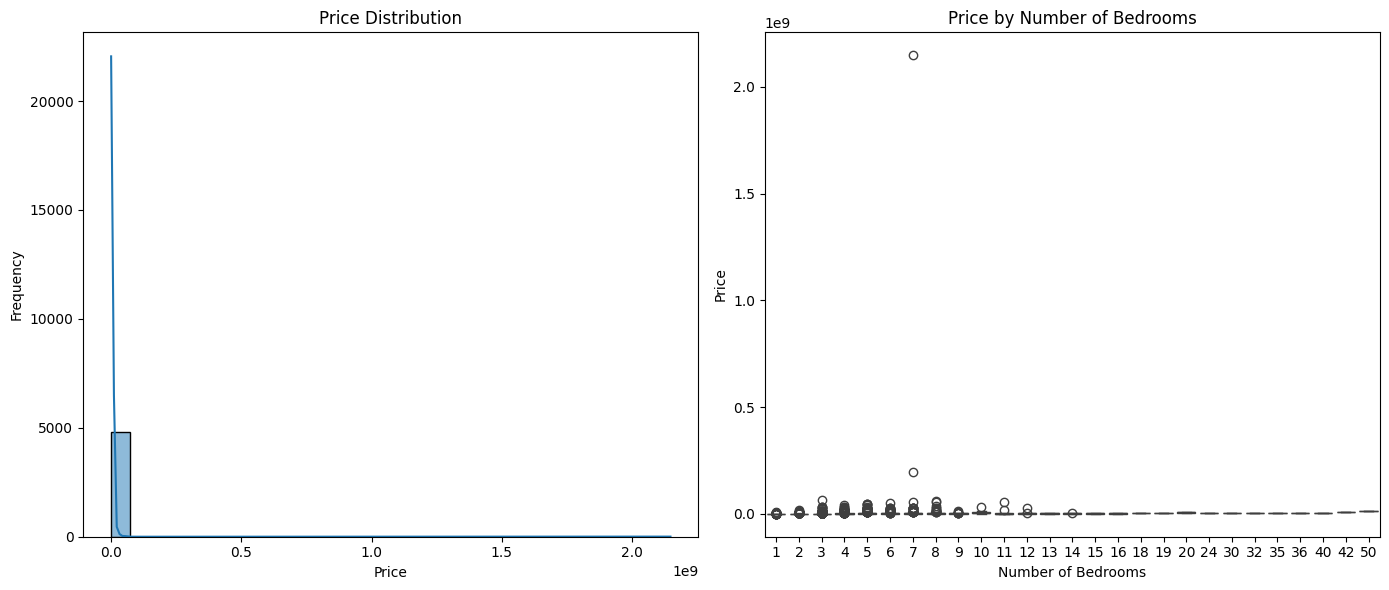

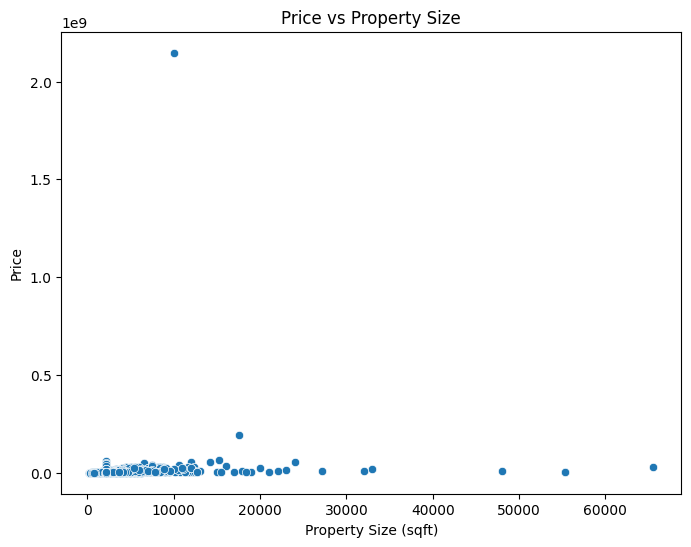

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


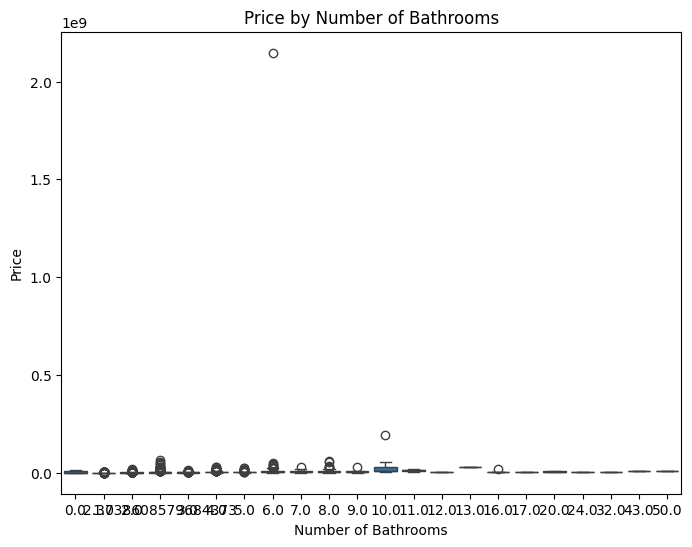

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('NY-House-Dataset.csv')

# 기본적인 시각화 설정
plt.figure(figsize=(14, 6))

# 가격 분포 시각화
plt.subplot(1, 2, 1)
sns.histplot(df['PRICE'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 침실 수에 따른 가격 시각화
plt.subplot(1, 2, 2)
sns.boxplot(x='BEDS', y='PRICE', data=df)
plt.title('Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# 가격과 면적의 관계 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=df)
plt.title('Price vs Property Size')
plt.xlabel('Property Size (sqft)')
plt.ylabel('Price')
plt.show()

# 가격과 욕실 수에 따른 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='BATH', y='PRICE', data=df)
plt.title('Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()


# 이상치 제거 후 시각화

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


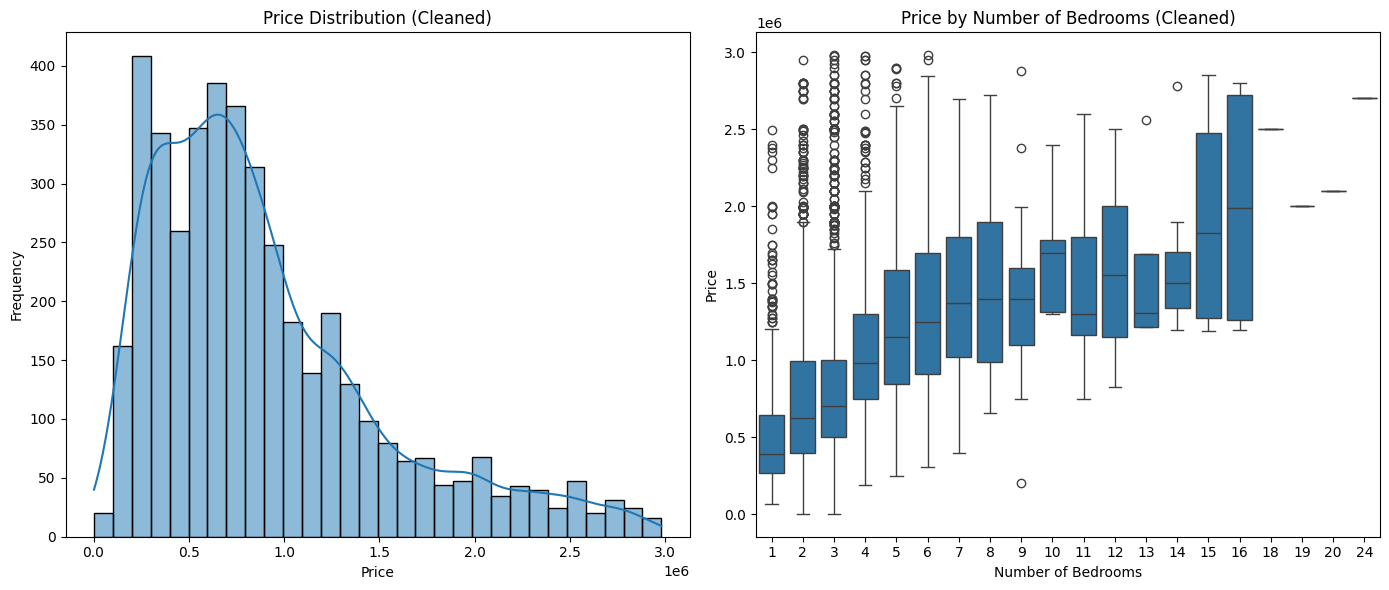

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df_cleaned = pd.read_csv('NY-House-Dataset.csv')

# 이상치 제거 함수 정의
def remove_outliers(df):
    # IQR 기반으로 이상치 제거
    Q1 = df['PRICE'].quantile(0.25)
    Q3 = df['PRICE'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['PRICE'] >= (Q1 - 1.5 * IQR)) & (df['PRICE'] <= (Q3 + 1.5 * IQR))]

    return df

# 이상치 제거
df_cleaned = remove_outliers(df_cleaned)

# 기본적인 시각화 설정
plt.figure(figsize=(14, 6))

# 가격 분포 시각화
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['PRICE'], bins=30, kde=True)
plt.title('Price Distribution (Cleaned)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 침실 수에 따른 가격 시각화
plt.subplot(1, 2, 2)
sns.boxplot(x='BEDS', y='PRICE', data=df_cleaned)
plt.title('Price by Number of Bedrooms (Cleaned)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# 가격과 면적의 관계 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=df_cleaned)
plt.title('Price vs Property Size (Cleaned)')
plt.xlabel('Property Size (sqft)')
plt.ylabel('Price')
plt.show()

# 가격과 욕실 수에 따른 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='BATH', y='PRICE', data=df_cleaned)
plt.title('Price by Number of Bathrooms (Cleaned)')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()


# 이상치 제거 후 데이터 갯수 비교

In [ ]:
# IQR을 이용한 이상치 제거 함수
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 제거
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 데이터 불러오기
df = pd.read_csv('NY-House-Dataset.csv')

# PRICE와 PROPERTYSQFT에 대해 이상치 제거
df_cleaned = remove_outliers_iqr(df, 'PRICE')
df_cleaned = remove_outliers_iqr(df_cleaned, 'PROPERTYSQFT')

# 이상치 제거 후 데이터 크기 확인
print(f'Original dataset size: {df.shape[0]}')
print(f'Cleaned dataset size: {df_cleaned.shape[0]}')

Original dataset size: 4801
Cleaned dataset size: 4111


# 가격과 다른 변수 간의 상관관계 시각화

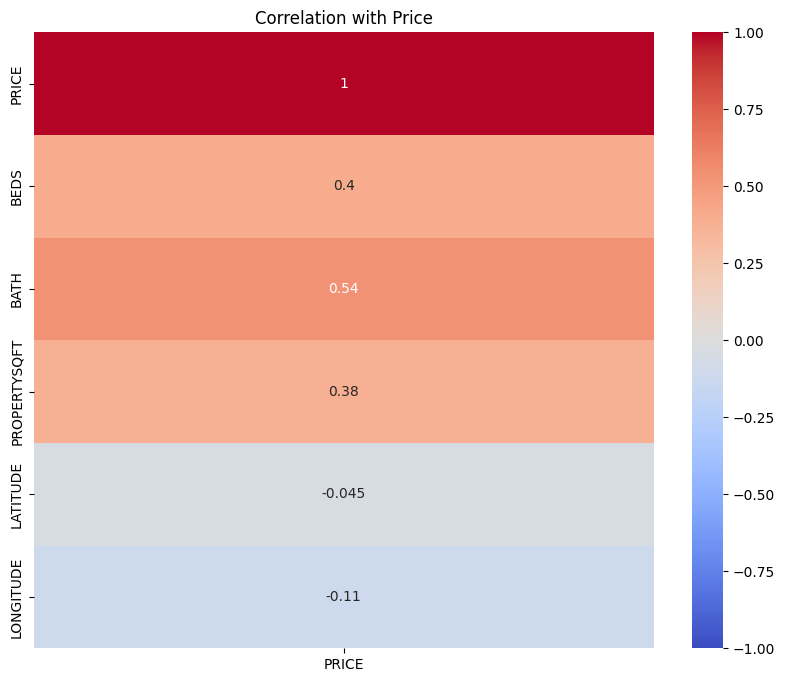

In [ ]:
# 범주형 변수 제거
numerical_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# 상관 행렬 계산
correlation_matrix = numerical_df.corr()

# 가격과의 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['PRICE']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Price')
plt.show()

# 이상치 제거 후 다시 머신러닝

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 특징 변수(X)와 목표 변수(y) 분리
X_cleaned = df_cleaned.drop('PRICE', axis=1)
y_cleaned = df_cleaned['PRICE']

# 범주형 데이터와 수치형 데이터를 나누어 처리
categorical_features = ['BROKERTITLE', 'TYPE', 'STATE', 'ADDRESS', 'MAIN_ADDRESS']
numeric_features = ['BEDS', 'BATH', 'PROPERTYSQFT']

# 범주형 데이터를 One-Hot Encoding으로 변환
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# 모델 리스트
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# 모델 성능 평가
results_cleaned = {}

for name, model in models.items():
    # 파이프라인 설정
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # 모델 학습
    model_pipeline.fit(X_train_cleaned, y_train_cleaned)

    # 예측
    y_pred_cleaned = model_pipeline.predict(X_test_cleaned)

    # 성능 평가
    mae = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
    mse = mean_squared_error(y_test_cleaned, y_pred_cleaned)
    rmse = mse ** 0.5
    r2 = r2_score(y_test_cleaned, y_pred_cleaned)

    results_cleaned[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }

# 결과 출력
for model_name, metrics in results_cleaned.items():
    print(f"Model: {model_name}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R2 Score: {metrics['R2 Score']}\n")

# 총합 코드

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# 데이터 불러오기
df = pd.read_csv('NY-House-Dataset.csv')

# 가격의 1.5배 IQR을 사용하여 이상치 제거
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 제거
df_cleaned = df[~((df['PRICE'] < (Q1 - 1.5 * IQR)) | (df['PRICE'] > (Q3 + 1.5 * IQR)))]

# 특징 변수(X)와 목표 변수(y) 분리
X = df_cleaned.drop('PRICE', axis=1)
y = df_cleaned['PRICE']

# 범주형 데이터와 수치형 데이터를 나누어 처리
categorical_features = ['BROKERTITLE', 'TYPE', 'STATE', 'ADDRESS', 'MAIN_ADDRESS']
numeric_features = ['BEDS', 'BATH', 'PROPERTYSQFT']

# 범주형 데이터를 One-Hot Encoding으로 변환
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# 모델 리스트
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
trained_models = {}
for name, model in models.items():
    # 파이프라인 설정
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # 모델 학습
    model_pipeline.fit(X_train, y_train)

    # 학습된 모델 저장
    trained_models[name] = model_pipeline

In [126]:
# 특정 인덱스 범위를 지정하는 함수
def predict_price_range(start_index, end_index):
    if start_index < 0 or end_index >= len(X_test) or start_index > end_index:
        print("유효하지 않은 인덱스 범위입니다.")
        return

    for index in range(start_index, end_index + 1):
        print(f"\n인덱스 {index}에 대한 예측:")
        input_data = X_test.iloc[[index]]

        # 예측값 저장할 딕셔너리
        predictions = {}

        # 각 모델에 대해 예측 수행
        for model_name, trained_model in trained_models.items():
            # 예측 수행
            predicted_price = trained_model.predict(input_data)
            predictions[model_name] = predicted_price[0]

        # 예측 결과 출력
        print(f"Input Data (Index {index}):")
        print(input_data)
        print("\n예측 가격:")
        for model_name, predicted_price in predictions.items():
            print(f"{model_name}: {predicted_price}")

        # 실제 가격 출력
        actual_price = y_test.iloc[index]
        print(f"\n실제 가격: {actual_price}")

In [127]:
# 유효한 인덱스 범위 출력
print(f"유효한 인덱스 범위: 0 ~ {len(X_test) - 1}")

유효한 인덱스 범위: 0 ~ 848


In [128]:
# 인덱스 범위 지정
start_index = int(input("시작 인덱스를 입력하세요: "))
end_index = int(input("끝 인덱스를 입력하세요: "))

# 지정된 범위에 대한 예측 수행
predict_price_range(start_index, end_index)

시작 인덱스를 입력하세요: 3
끝 인덱스를 입력하세요: 6

인덱스 3에 대한 예측:
Input Data (Index 3):
                     BROKERTITLE            TYPE  BEDS  BATH  PROPERTYSQFT  \
201  Brokered by eXp Realty BKNY  House for sale     2   1.0         586.0   

             ADDRESS                    STATE  \
201  231 Freeborn St  Staten Island, NY 10306   

                               MAIN_ADDRESS ADMINISTRATIVE_AREA_LEVEL_2  \
201  231 Freeborn StStaten Island, NY 10306               United States   

     LOCALITY      SUBLOCALITY    STREET_NAME        LONG_NAME  \
201  New York  Richmond County  Staten Island  Freeborn Street   

                                 FORMATTED_ADDRESS   LATITUDE  LONGITUDE  
201  231 Freeborn St, Staten Island, NY 10306, USA  40.574103 -74.093167  

예측 가격:
Random Forest: 369272.19
Gradient Boosting: 465411.2780996501
XGBoost: 345430.40625

실제 가격: 390000

인덱스 4에 대한 예측:
Input Data (Index 4):
                   BROKERTITLE            TYPE  BEDS  BATH  PROPERTYSQFT  \
2099  Brokered by qv